In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# LOAN DATA 

In [4]:
df=pd.read_csv(r'C:\Users\Asus\Downloads\loan_data.csv')


# DATA ANALYSING

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [9]:
df.shape

(381, 13)

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
obj=df.select_dtypes(include=['object'])
obj


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
3,LP001008,Male,No,0,Graduate,No,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,Rural,Y
378,LP002978,Female,No,0,Graduate,No,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,Rural,Y


In [29]:
for i in ['Self_Employed','Dependents','Gender']:
    df[i]=df[i].fillna(df[i].mode()[0])
df[i]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
376      Male
377      Male
378    Female
379      Male
380    Female
Name: Gender, Length: 381, dtype: object

In [30]:
for i in ['Credit_History','Loan_Amount_Term']:
    df[i]=df[i].fillna(df[i].median())
df[i]

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
376    360.0
377    360.0
378    360.0
379    180.0
380    360.0
Name: Loan_Amount_Term, Length: 381, dtype: float64

In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Data Cleaning

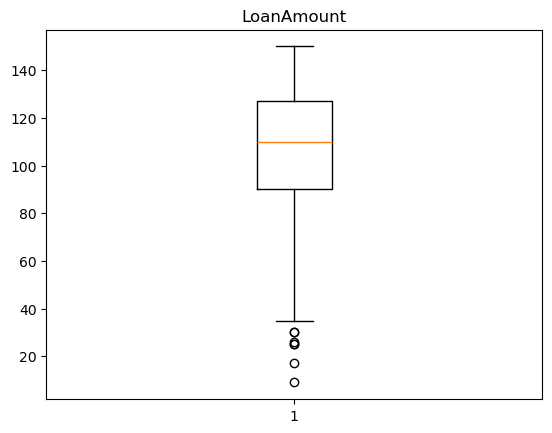

In [36]:
plt.boxplot(df['LoanAmount'])
plt.title('LoanAmount');

In [37]:
Q1=np.percentile(df['LoanAmount'],25,interpolation='midpoint')
Q2=np.percentile(df['LoanAmount'],50,interpolation='midpoint')
Q3=np.percentile(df['LoanAmount'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

90.0
110.0
127.0


In [38]:
IQR=Q3-Q1
print(IQR)

37.0


In [43]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print('Upper_limit:',upper)
print('Lower_limit:',lower)

Upper_limit: 182.5
Lower_limit: 34.5


In [47]:
outlier=[]
for i in df['LoanAmount']:
    if((i>upper)or(i<lower)):
        outlier.append(i)
outlier

[17.0, 25.0, 25.0, 30.0, 30.0, 26.0, 9.0]

In [48]:
df2=((df['LoanAmount'])>upper)|((df['LoanAmount'])<lower)
df2

0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Name: LoanAmount, Length: 381, dtype: bool

In [49]:
df.loc[df2]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
65,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y
84,LP001482,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y
91,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
168,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
350,LP002792,Male,Yes,1,Graduate,No,5468,1032.0,26.0,360.0,1.0,Semiurban,Y
357,LP002840,Female,No,0,Graduate,No,2378,0.0,9.0,360.0,1.0,Urban,N


In [50]:
df2=df.loc[df2].index
df2

Index([8, 65, 84, 91, 168, 350, 357], dtype='int64')

In [52]:
df.drop(df2,axis=0,inplace=True)


In [53]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,No,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
10,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,1.0,Urban,Y


In [91]:
df=df.reset_index(drop=True)

In [94]:
df.shape

(374, 13)

# DATA TRANSFORMING

In [95]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
le=LabelEncoder()

In [98]:
obj=df.select_dtypes(include='object')
obj

""
0
1
2
3
4
...
369
370
371
372


In [99]:
for i in obj.columns:
    df[i]=le.fit_transform(df[i])


In [100]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

# DATA SCALING

In [101]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [102]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [103]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [104]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
1,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
2,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
3,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
4,4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2


In [105]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
minmax=MinMaxScaler()

In [108]:
x=minmax.fit_transform(x)
x

array([[0.        , 1.        , 1.        , ..., 0.74358974, 1.        ,
        0.        ],
       [0.00268097, 1.        , 1.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.00536193, 1.        , 1.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [0.99463807, 0.        , 0.        , ..., 0.74358974, 1.        ,
        0.        ],
       [0.99731903, 1.        , 1.        , ..., 0.35897436, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

In [109]:
data=pd.DataFrame(x,columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.000000,1.0,1.0,0.333333,0.0,0.0,0.464043,0.044567,0.808696,0.743590,1.0,0.0
1,0.002681,1.0,1.0,0.000000,0.0,1.0,0.298336,0.000000,0.269565,0.743590,1.0,1.0
2,0.005362,1.0,1.0,0.000000,1.0,0.0,0.254684,0.069687,0.739130,0.743590,1.0,1.0
3,0.008043,1.0,0.0,0.000000,0.0,0.0,0.612373,0.000000,0.921739,0.743590,1.0,1.0
4,0.010724,1.0,1.0,0.000000,1.0,0.0,0.228515,0.044803,0.521739,0.743590,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.0,1.0,1.000000,0.0,0.0,0.581283,0.000000,0.808696,0.743590,1.0,1.0
370,0.991957,1.0,1.0,0.000000,0.0,0.0,0.322621,0.057629,0.634783,0.743590,1.0,0.0
371,0.994638,0.0,0.0,0.000000,0.0,0.0,0.287868,0.000000,0.313043,0.743590,1.0,0.0
372,0.997319,1.0,1.0,1.000000,0.0,0.0,0.414111,0.000000,0.043478,0.358974,1.0,0.0


In [110]:
output=pd.concat([data,y],axis=1)
output

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.0,1.0,0.333333,0.0,0.0,0.464043,0.044567,0.808696,0.743590,1.0,0.0,0
1,0.002681,1.0,1.0,0.000000,0.0,1.0,0.298336,0.000000,0.269565,0.743590,1.0,1.0,1
2,0.005362,1.0,1.0,0.000000,1.0,0.0,0.254684,0.069687,0.739130,0.743590,1.0,1.0,1
3,0.008043,1.0,0.0,0.000000,0.0,0.0,0.612373,0.000000,0.921739,0.743590,1.0,1.0,1
4,0.010724,1.0,1.0,0.000000,1.0,0.0,0.228515,0.044803,0.521739,0.743590,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.989276,1.0,1.0,1.000000,0.0,0.0,0.581283,0.000000,0.808696,0.743590,1.0,1.0,1
370,0.991957,1.0,1.0,0.000000,0.0,0.0,0.322621,0.057629,0.634783,0.743590,1.0,0.0,1
371,0.994638,0.0,0.0,0.000000,0.0,0.0,0.287868,0.000000,0.313043,0.743590,1.0,0.0,1
372,0.997319,1.0,1.0,1.000000,0.0,0.0,0.414111,0.000000,0.043478,0.358974,1.0,0.0,1


# DATA VISUALISING

C:\Users\Asus\AppData\Local\Temp\ipykernel_7116\1181076238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=output, palette='coolwarm')


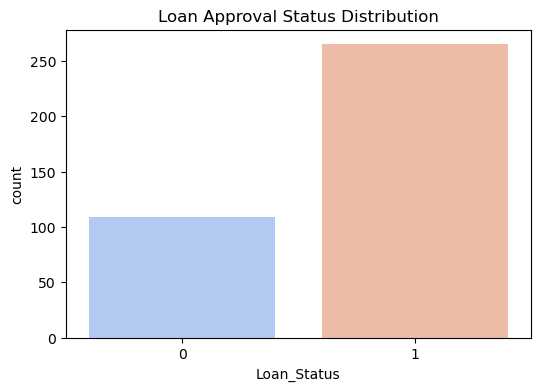

In [116]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=output, palette='coolwarm')
plt.title('Loan Approval Status Distribution')
plt.show()

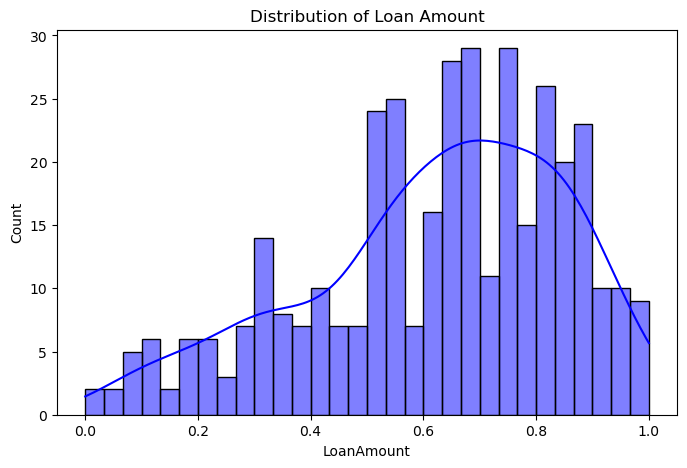

In [117]:
plt.figure(figsize=(8, 5))
sns.histplot(output['LoanAmount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Loan Amount')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_7116\3704463887.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=output, palette='Set2')


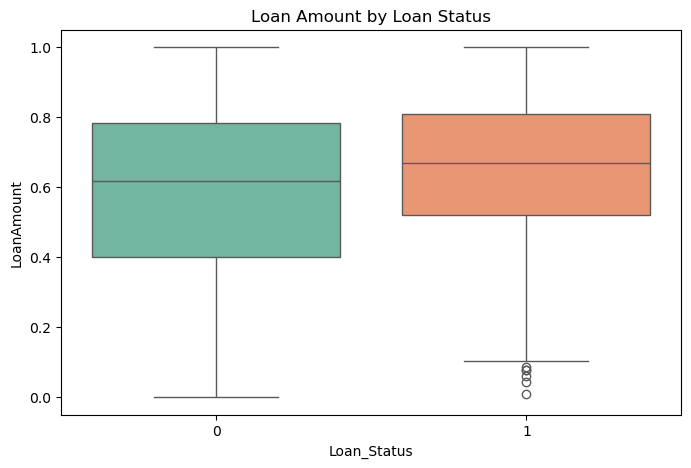

In [118]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=output, palette='Set2')
plt.title('Loan Amount by Loan Status')
plt.show()#This helps identify how loan amounts vary for approved vs. non-approved loans.

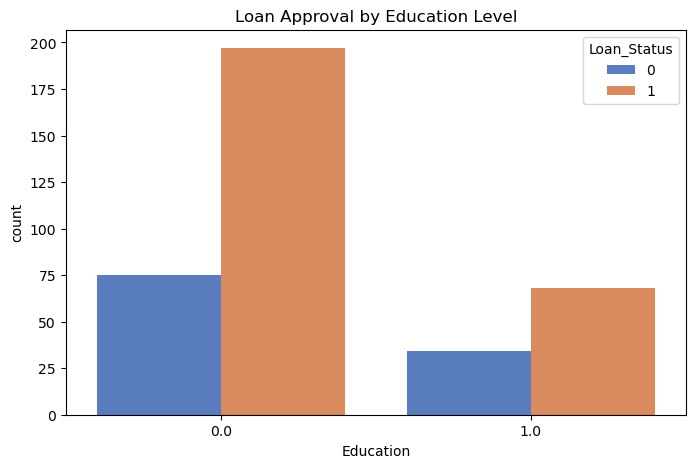

In [119]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', hue='Loan_Status', data=output, palette='muted')
plt.title('Loan Approval by Education Level')
plt.show()